# <center><b> <em> Feature Engineering </em> </b></center>

## <font color="green"> | - Import des Biblio et Dataframe</font>

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import numpy as np

In [41]:
# Read the XLSX file
data = pd.read_csv("data/dataset_silver.csv")

In [42]:
data.head()

,titre,date,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,box_office_total,note_presse,note_spectateurs,nombre_article,recompenses,description,boxoffice,genres
0,"Super Mario Bros, le film",2023-05-04,92.0,Aaron Horvath,Universal Pictures International France,"['Pierre Tessier', 'Chris Pratt', 'Jérémie Cov...",U.S.A.,['Anglais'],Long-métrage,2023,7178203.0,3.1,4.1,1022.0,NaN,Alors qu’ils tentent de réparer une canalisati...,1866914,"['Animation', 'Comédie', 'Famille']"
1,Les Vengeances de Maître Poutifard,2023-06-28,90.0,Pierre-François Martin-Laval,UGC Distribution,"['Christian Clavier', 'Isabelle Nanty', 'Jenni...",France,['Français'],Long-métrage,2023,421927.0,2.0,2.0,5.0,NaN,"Instituteur à la retraite, Robert Poutifard n'...",180735,"['Comédie', 'Famille']"
2,Des mains en or,2023-07-06,90.0,Isabelle Mergault,Zinc Film,"['Lambert Wilson', 'Josiane Balasko', 'Sylvie ...",France,['Français'],Long-métrage,2023,269253.0,2.2,3.4,6.0,NaN,"François, futur académicien, est un écrivain c...",109081,['Comédie']
3,The Covenant,2023-06-23,123.0,Guy Ritchie,-,"['Jake Gyllenhaal', 'Dar Salim', 'Alexander Lu...",Grande-Bretagne,['Anglais'],Long-métrage,2023,NaN,3.1,4.1,7.0,NaN,"Lors de sa dernière mission en Afghanistan, le...",6380188,"['Action', 'Guerre', 'Thriller']"
4,"Cléo, Melvil et moi",2023-05-07,73.0,Arnaud Viard,Moonlight Films Distribution,"['Arnaud Viard', 'Marianne Denicourt', 'Romane...",France,['Français'],Long-métrage,2023,2306.0,3.3,3.2,12.0,NaN,"Dans le Paris désert du premier confinement, A...",1849,['Comédie dramatique']


In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10201 entries, 0 to 10200
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   titre             10201 non-null  object 
 1   date              9679 non-null   object 
 2   durée             10201 non-null  float64
 3   réalisateur       10201 non-null  object 
 4   distributeur      10201 non-null  object 
 5   acteurs           10201 non-null  object 
 6   nationalités      10201 non-null  object 
 7   langue_d_origine  10201 non-null  object 
 8   type_film         10201 non-null  object 
 9   annee_production  10201 non-null  int64  
 10  box_office_total  8347 non-null   float64
 11  note_presse       10201 non-null  float64
 12  note_spectateurs  10201 non-null  float64
 13  nombre_article    9786 non-null   float64
 14  recompenses       4066 non-null   object 
 15  description       9191 non-null   object 
 16  boxoffice         10201 non-null  int64 

In [44]:
data.shape

(10201, 18)

## <font color="green"> || - Missing Data </font>

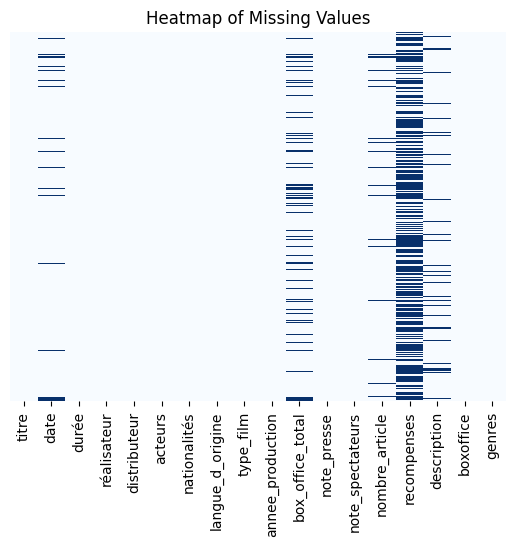

In [45]:
# Create a figure and axes for the plot
fig, ax = plt.subplots()
sns.heatmap(data.isnull(), ax=ax, yticklabels=False, cbar=False, cmap="Blues")
ax.set_title("Heatmap of Missing Values")
plt.show()

In [46]:
data.isnull().sum()

titre                  0
date                 522
durée                  0
réalisateur            0
distributeur           0
acteurs                0
nationalités           0
langue_d_origine       0
type_film              0
annee_production       0
box_office_total    1854
note_presse            0
note_spectateurs       0
nombre_article       415
recompenses         6135
description         1010
boxoffice              0
genres                 0
dtype: int64

## <font color="green"> ||| - Duplicated Data </font>

In [47]:
data.duplicated().sum()

0

## <font color="green"> IV - Ajout colonnes Awards et Nominations </font>

In [48]:
# Extract the number of awards and nominations using regular expressions
data['awards'] = data['recompenses'].apply(lambda x: int(re.search(r'(\d+) prix', str(x)).group(1)) if re.search(r'(\d+) prix', str(x)) else 0)
data['nominations'] = data['recompenses'].apply(lambda x: int(re.search(r'(\d+) nominations', str(x)).group(1)) if re.search(r'(\d+) nominations', str(x)) else 0)

In [49]:
# Drop the 'recompenses' column if no longer needed
data.drop(columns=['recompenses'], inplace=True)

In [50]:
data.head()

,titre,date,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,box_office_total,note_presse,note_spectateurs,nombre_article,description,boxoffice,genres,awards,nominations
0,"Super Mario Bros, le film",2023-05-04,92.0,Aaron Horvath,Universal Pictures International France,"['Pierre Tessier', 'Chris Pratt', 'Jérémie Cov...",U.S.A.,['Anglais'],Long-métrage,2023,7178203.0,3.1,4.1,1022.0,Alors qu’ils tentent de réparer une canalisati...,1866914,"['Animation', 'Comédie', 'Famille']",0,0
1,Les Vengeances de Maître Poutifard,2023-06-28,90.0,Pierre-François Martin-Laval,UGC Distribution,"['Christian Clavier', 'Isabelle Nanty', 'Jenni...",France,['Français'],Long-métrage,2023,421927.0,2.0,2.0,5.0,"Instituteur à la retraite, Robert Poutifard n'...",180735,"['Comédie', 'Famille']",0,0
2,Des mains en or,2023-07-06,90.0,Isabelle Mergault,Zinc Film,"['Lambert Wilson', 'Josiane Balasko', 'Sylvie ...",France,['Français'],Long-métrage,2023,269253.0,2.2,3.4,6.0,"François, futur académicien, est un écrivain c...",109081,['Comédie'],0,0
3,The Covenant,2023-06-23,123.0,Guy Ritchie,-,"['Jake Gyllenhaal', 'Dar Salim', 'Alexander Lu...",Grande-Bretagne,['Anglais'],Long-métrage,2023,NaN,3.1,4.1,7.0,"Lors de sa dernière mission en Afghanistan, le...",6380188,"['Action', 'Guerre', 'Thriller']",0,0
4,"Cléo, Melvil et moi",2023-05-07,73.0,Arnaud Viard,Moonlight Films Distribution,"['Arnaud Viard', 'Marianne Denicourt', 'Romane...",France,['Français'],Long-métrage,2023,2306.0,3.3,3.2,12.0,"Dans le Paris désert du premier confinement, A...",1849,['Comédie dramatique'],0,0


## <font color="green"> V - Ajout colonnes nombre Acteurs Connus </font>

In [51]:

# # Charger le fichier "top_acteur.csv" contenant les acteurs connus dans un DataFrame
df_acteurs_connus = pd.read_csv('data/top_acteurs.csv')

In [52]:
# Créer un ensemble dans noms des acteurs connus à partir de la base de données des top acteurs
acteurs_connus = set(df_acteurs_connus['acteur'])

# Compter le nombre d'acteurs connus dans chaque film et créer une nouvelle colonne pour cela
data['nombre_acteurs_connus'] = data['acteurs'].apply(lambda x: len([acteur for acteur in eval(x) if acteur in acteurs_connus]))

# Ajouter une colonne contenant les acteurs connus dans chaque film
data['acteurs_connus'] = data['acteurs'].apply(lambda x: [acteur for acteur in eval(x) if acteur in acteurs_connus])

## <font color="green"> VI - Ajout colonnes Réalisateur Connus </font>

In [53]:
# # Create a new column in the DataFrame 'data' to indicate presence in the CSV
data['realisateur_connu'] = data['réalisateur'].isin(acteurs_connus)

In [54]:
# Check if "Quentin Tarantino" exists in the 'réalisateur' column
if data['réalisateur'].str.contains('Quentin Tarantino', case=False).any():
    print("Quentin Tarantino exists in the 'réalisateur' column.")
else:
    print("Quentin Tarantino does not exist in the 'réalisateur' column.")


Quentin Tarantino exists in the 'réalisateur' column.


In [61]:
data

,titre,date,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,...,note_spectateurs,nombre_article,description,boxoffice,genres,awards,nominations,nombre_acteurs_connus,acteurs_connus,realisateur_connu
0,"Super Mario Bros, le film",2023-05-04,92.000000,Aaron Horvath,Universal Pictures International France,"['Pierre Tessier', 'Chris Pratt', 'Jérémie Cov...",U.S.A.,['Anglais'],Long-métrage,2023,...,4.100000,1022.0,Alors qu’ils tentent de réparer une canalisati...,1866914,"['Animation', 'Comédie', 'Famille']",0,0,1,[Chris Pratt],False
1,Les Vengeances de Maître Poutifard,2023-06-28,90.000000,Pierre-François Martin-Laval,UGC Distribution,"['Christian Clavier', 'Isabelle Nanty', 'Jenni...",France,['Français'],Long-métrage,2023,...,2.000000,5.0,"Instituteur à la retraite, Robert Poutifard n'...",180735,"['Comédie', 'Famille']",0,0,1,[Christian Clavier],False
2,Des mains en or,2023-07-06,90.000000,Isabelle Mergault,Zinc Film,"['Lambert Wilson', 'Josiane Balasko', 'Sylvie ...",France,['Français'],Long-métrage,2023,...,3.400000,6.0,"François, futur académicien, est un écrivain c...",109081,['Comédie'],0,0,2,"[Lambert Wilson, Josiane Balasko]",False
3,The Covenant,2023-06-23,123.000000,Guy Ritchie,-,"['Jake Gyllenhaal', 'Dar Salim', 'Alexander Lu...",Grande-Bretagne,['Anglais'],Long-métrage,2023,...,4.100000,7.0,"Lors de sa dernière mission en Afghanistan, le...",6380188,"['Action', 'Guerre', 'Thriller']",0,0,1,[Jake Gyllenhaal],True
4,"Cléo, Melvil et moi",2023-05-07,73.000000,Arnaud Viard,Moonlight Films Distribution,"['Arnaud Viard', 'Marianne Denicourt', 'Romane...",France,['Français'],Long-métrage,2023,...,3.200000,12.0,"Dans le Paris désert du premier confinement, A...",1849,['Comédie dramatique'],0,0,0,[],False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10196,La Mujer de mi hermano,NaN,89.000000,Ricardo de Montreuil,-,"['Bárbara Mori', 'Christian Meier', 'Manolo Ca...",Argentine,['Espagnol'],Long-métrage,2005,...,3.016116,NaN,"La monotonie gagne le couple de Zoe, jeune fem...",1018750,['Drame'],0,0,0,[],False
10197,Gracie,NaN,97.000000,Davis Guggenheim,-,"['Carly Schroeder', 'Dermot Mulroney', 'Jesse ...",U.S.A.,['Anglais'],Long-métrage,2007,...,3.016116,NaN,"En 1978, une adolescente dont le frère, as du ...",1355904,['Drame'],0,0,0,[],False
10198,Keeping up with the Steins,NaN,99.000000,Scott Marshall,-,"['Jami Gertz', 'Daryl Hannah', 'Garry Marshall']",U.S.A.,['Anglais'],Long-métrage,2006,...,3.016116,1.0,"Benjamin, un jeune garçon juif de 13 ans est s...",653723,['Comédie'],0,0,0,[],False
10199,Impractical Jokers: The Movie,NaN,93.000000,Chris Henchy,-,"['Brian Quinn', 'Joe Gatto', 'Sal Vulcano']",U.S.A.,['Anglais'],Long-métrage,2020,...,3.016116,NaN,"Quatre amis, Joe, Q, Murr et Sal, alias les Jo...",3545000,['Comédie'],0,0,0,[],False


In [55]:
data['genres']

0        ['Animation', 'Comédie', 'Famille']
1                     ['Comédie', 'Famille']
2                                ['Comédie']
3           ['Action', 'Guerre', 'Thriller']
4                     ['Comédie dramatique']
                        ...                 
10196                              ['Drame']
10197                              ['Drame']
10198                            ['Comédie']
10199                            ['Comédie']
10200      ['Comédie dramatique', 'Romance']
Name: genres, Length: 10201, dtype: object

In [56]:
# # Sample DataFrame with the 'genre' column
# data = pd.DataFrame({
#     'genre': [
#         ['Animation', 'Comédie', 'Famille'],
#         ['Comédie', 'Famille'],
#         ['Comédie'],
#         ['Action', 'Guerre', 'Thriller'],
#         ['Comédie dramatique'],
#         ['Drame', 'Historique', 'Romance'],
#         ['Drame'],
#         ['Biopic', 'Drame'],
#         ['Comédie'],
#         ['Aventure', 'Historique'],
#         ['Biopic', 'Drame'],
#         ['Biopic', 'Drame', 'Musical'],
#         ['Action'],
#         ['Action', 'Comédie'],
#         ['Thriller'],
#         ['Drame'],
#         ['Epouvante-horreur', 'Science fiction', 'Thriller'],
#         ['Biopic', 'Epouvante-horreur', 'Fantastique'],
#         ['Aventure', 'Historique'],
#         ['Comédie', 'Policier'],
#         ['Policier', 'Thriller'],
#         ['Comédie'],
#         ['Comédie'],
#         ['Epouvante-horreur'],
#         ['Drame'],
#         ['Animation', 'Famille', 'Fantastique'],
#         ['Animation', 'Famille', 'Fantastique'],
#         ['Comédie'],
#         ['Comédie'],
#         ['Comédie musicale', 'Drame'],
#         ['Comédie musicale', 'Drame'],
#         ['Drame', 'Romance']
#     ]
# })

# Step 1: Explode the 'genre' column to expand lists into separate rows
data_exploded = data.explode('genres')

# Step 2: Perform one-hot encoding on the exploded 'genre' column
genres_encoded = pd.get_dummies(data_exploded['genres'])

# Step 3: Combine the one-hot encoded genres with the original DataFrame
data_encoded = pd.concat([data, genres_encoded], axis=1)

# Step 4: Drop the original 'genre' column (optional)
# data_encoded.drop(columns=['genre'], inplace=True)

print(data_encoded)


                                    titre        date       durée  \
0               Super Mario Bros, le film  2023-05-04   92.000000   
1      Les Vengeances de Maître Poutifard  2023-06-28   90.000000   
2                         Des mains en or  2023-07-06   90.000000   
3                            The Covenant  2023-06-23  123.000000   
4                     Cléo, Melvil et moi  2023-05-07   73.000000   
...                                   ...         ...         ...   
10196              La Mujer de mi hermano         NaN   89.000000   
10197                              Gracie         NaN   97.000000   
10198          Keeping up with the Steins         NaN   99.000000   
10199       Impractical Jokers: The Movie         NaN   93.000000   
10200                     Meet the Browns         NaN  103.340349   

                        réalisateur                             distributeur  \
0                     Aaron Horvath  Universal Pictures International France   
1      Pier

In [57]:
data_encoded.shape

(10201, 600)

In [58]:

data_encoded.head()

,titre,date,durée,réalisateur,distributeur,acteurs,nationalités,langue_d_origine,type_film,annee_production,...,['Policier'],"['Romance', 'Science fiction', 'Thriller']","['Romance', 'Science fiction']","['Romance', 'Thriller']","['Romance', 'Western']",['Romance'],"['Science fiction', 'Thriller']",['Science fiction'],['Thriller'],['Western']
0,"Super Mario Bros, le film",2023-05-04,92.0,Aaron Horvath,Universal Pictures International France,"['Pierre Tessier', 'Chris Pratt', 'Jérémie Cov...",U.S.A.,['Anglais'],Long-métrage,2023,...,False,False,False,False,False,False,False,False,False,False
1,Les Vengeances de Maître Poutifard,2023-06-28,90.0,Pierre-François Martin-Laval,UGC Distribution,"['Christian Clavier', 'Isabelle Nanty', 'Jenni...",France,['Français'],Long-métrage,2023,...,False,False,False,False,False,False,False,False,False,False
2,Des mains en or,2023-07-06,90.0,Isabelle Mergault,Zinc Film,"['Lambert Wilson', 'Josiane Balasko', 'Sylvie ...",France,['Français'],Long-métrage,2023,...,False,False,False,False,False,False,False,False,False,False
3,The Covenant,2023-06-23,123.0,Guy Ritchie,-,"['Jake Gyllenhaal', 'Dar Salim', 'Alexander Lu...",Grande-Bretagne,['Anglais'],Long-métrage,2023,...,False,False,False,False,False,False,False,False,False,False
4,"Cléo, Melvil et moi",2023-05-07,73.0,Arnaud Viard,Moonlight Films Distribution,"['Arnaud Viard', 'Marianne Denicourt', 'Romane...",France,['Français'],Long-métrage,2023,...,False,False,False,False,False,False,False,False,False,False


In [70]:
print(data['awards'].unique())

[ 0  1  8  7  2  6 10 11  4 17  3 15 12 24  5  9 14 13 16 22 21 20 26 53
 18]


## <font color="green"> VI- Export gold Data </font>

In [59]:
#EXporter la data dans un Csv 
data.to_csv('data/dataset_gold.csv', index=False)

In [60]:
#EXporter la data dans un Csv 
data.to_csv('../Modeling/data/dataset_gold.csv', index=False)

OSError: Cannot save file into a non-existent directory: '../Modeling/data'